# Airbnb analysis for European capital cities
## 1. Introduction
Airbnb has posted the listing data for various cities across the world on http://insideairbnb.com/get-the-data.html. In this project I will be analyzing the data to find insights to housing prices across major cities in Europe.

In [310]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [311]:
import warnings
warnings.filterwarnings('ignore')

In [312]:
import re

## 2. Data Gathering
Airbnb has posted the listing data for various cities across the world on http://insideairbnb.com/get-the-data.html. I have downloaded the data to my local hard drive. The data is in the form of a compressed csv file.

In [313]:
# Listing all the folders with different city information stored in the local hard drive

path = r'C:\Users\srini\Projects\Airbnb'
folders= os.listdir(path)
folders

['Amsterdam',
 'Berlin',
 'Brussels',
 'Lisbon',
 'London',
 'Madrid',
 'Paris',
 'Rome']

In [314]:
# Importing the listing information for Amsterdam
df= pd.read_csv(os.path.join(path,folders[0], 'listings.csv.gz'))
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200508171622,2020-05-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.05
1,9693,https://www.airbnb.com/rooms/9693,20200508171622,2020-05-09,Top Location on Canal (Center Flat),You will love your stay here. It is a beautifu...,This beautiful apartment in the heart of 17th ...,You will love your stay here. It is a beautifu...,none,You will be on a beautiful quite canal and wil...,...,t,f,moderate,f,f,1,1,0,0,0.45


In [315]:
df.shape

(19278, 106)

Since the data for each city has the same file name 'listings' it will be accessed from across all the folders and merged to form a master dataframe.

In [316]:
# Merging the listing across all cities to form a master dataframe
for i,city in enumerate(folders):
    try:
        if i==0:
            df= pd.read_csv(os.path.join(path,city, 'listings.csv.gz'), low_memory=False)
                                                # reading the csv file for Amsterdam
        else:
            df= pd.concat([df,pd.read_csv(os.path.join(path,city, 'listings.csv.gz'),low_memory=False)] ) 
                                                # joining the remaining files
            
    except:
        print(city)


In [317]:
# Sending the compiled file to a local hard drive
df.to_csv(os.path.join(path,'listing_master.csv'), index= False)
df.shape

(276214, 106)

The master dataframe consists of more than 300,000 rows and 106 columns.

## 3. Data Wrangling

In [318]:
# Listing all the values for the first row
for i,col_name in enumerate(df.columns):
    print(col_name, df.iloc[0,i])

id 2818
listing_url https://www.airbnb.com/rooms/2818
scrape_id 20200508171622
last_scraped 2020-05-09
name Quiet Garden View Room & Super Fast WiFi
summary Quiet Garden View Room & Super Fast WiFi
space I'm renting a bedroom (room overlooking the garden) in my apartment in Amsterdam,  The room is located to the east of the city centre in a quiet, typical Amsterdam neighbourhood the "Indische Buurt". Amsterdam’s historic centre is less than 15 minutes away by bike or tram. The features of the room are: - Twin beds (80 x 200 cm, down quilts and pillows)  - 2 pure cotton towels for each guest  - reading lamps - bedside table - wardrobe - table with chairs - tea and coffee making facilities - mini bar - alarm clock - Hi-Fi system with cd player, connection for mp3 player / phone - map of Amsterdam and public transport - Wi-Fi Internet connection  Extra services: - Bike rental
description Quiet Garden View Room & Super Fast WiFi I'm renting a bedroom (room overlooking the garden) in my apa

### 3.1 Essential feature selection
Only some columns are essential for our current analysis. We will make a subset of our dataframe with the essential columns. For example columns with the house discription or picture of the house or the host are not essential for our analysis here and will be ignored.

In [319]:
# Making a list for essential columns
essential_columns= ['id', 'name', 'host_id','host_since', 'host_response_time','host_response_rate','host_acceptance_rate',\
'host_is_superhost','host_total_listings_count','host_verifications','street','city','country',\
 'property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','square_feet',\
'price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights',\
'maximum_nights','availability_30','availability_60','availability_90','availability_365', 'number_of_reviews', \
'number_of_reviews_ltm','first_review','last_review','review_scores_rating','review_scores_accuracy',\
'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',\
'review_scores_value','is_business_travel_ready','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification',\
'calculated_host_listings_count','calculated_host_listings_count_entire_homes',\
'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month']


I manually saw that the above columns would be essential for our Airbnb analysis and kept them.

In [320]:
# Making a subset dataframe with essential columns
df = df[essential_columns]

# Creating a backup for the cleaned dataframe
df.to_csv(os.path.join(path,'listing_master_clean.csv'), index= False)

df.shape

(276214, 55)

In [321]:
# Reading the csv 
df= pd.read_csv(os.path.join(path,'listing_master_clean.csv'))

### 3.2 Duplicate Values

In [322]:
# Finding duplicate values in the dataset
df.duplicated().sum()

0

In [323]:
# Finding if there are any duplicate IDs in the dataset
df.duplicated(subset= 'id', ).sum()

0

### 3.3 Removing the default index
Since we merged several dataframes together there are several rows with the same index number. These have to be removed.

In [324]:
# removing the default index 
df.reset_index(inplace= True)

In [325]:
# dropping the index column
df.drop(columns='index', inplace= True)

### 3.3 Data Types

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276214 entries, 0 to 276213
Data columns (total 55 columns):
id                                              276214 non-null int64
name                                            276001 non-null object
host_id                                         276214 non-null int64
host_since                                      276168 non-null object
host_response_time                              166552 non-null object
host_response_rate                              166552 non-null object
host_acceptance_rate                            209148 non-null object
host_is_superhost                               276168 non-null object
host_total_listings_count                       276168 non-null float64
host_verifications                              276214 non-null object
street                                          276214 non-null object
city                                            275469 non-null object
country                               

**3.3.1 Date format for Host_since**

In [327]:
# changing the data type for host_since column
df.host_since= pd.to_datetime(df.host_since, )
type(df.host_since[0])

pandas._libs.tslibs.timestamps.Timestamp

**3.3.2 Float for response_rate column**

In [328]:
# exploring the response rate column
df.host_response_rate.unique()

array(['100%', nan, '50%', '90%', '0%', '89%', '70%', '83%', '80%', '22%',
       '20%', '75%', '67%', '13%', '33%', '40%', '86%', '94%', '30%',
       '78%', '98%', '29%', '71%', '25%', '60%', '57%', '88%', '10%',
       '63%', '97%', '95%', '44%', '54%', '43%', '91%', '92%', '93%',
       '56%', '17%', '79%', '38%', '41%', '85%', '62%', '73%', '87%',
       '64%', '96%', '99%', '82%', '81%', '76%', '14%', '69%', '31%',
       '11%', '47%', '27%', '55%', '74%', '72%', '42%', '58%', '84%',
       '77%', '52%', '46%', '66%', '68%', '53%', '37%', '36%', '51%',
       '15%', '61%', '6%', '9%', '8%', '5%', '65%'], dtype=object)

In [329]:
# Filling missing values with an arbitary number for further processessing
df.host_response_rate.fillna('0.1%', inplace= True)
df.host_response_rate.unique()

array(['100%', '0.1%', '50%', '90%', '0%', '89%', '70%', '83%', '80%',
       '22%', '20%', '75%', '67%', '13%', '33%', '40%', '86%', '94%',
       '30%', '78%', '98%', '29%', '71%', '25%', '60%', '57%', '88%',
       '10%', '63%', '97%', '95%', '44%', '54%', '43%', '91%', '92%',
       '93%', '56%', '17%', '79%', '38%', '41%', '85%', '62%', '73%',
       '87%', '64%', '96%', '99%', '82%', '81%', '76%', '14%', '69%',
       '31%', '11%', '47%', '27%', '55%', '74%', '72%', '42%', '58%',
       '84%', '77%', '52%', '46%', '66%', '68%', '53%', '37%', '36%',
       '51%', '15%', '61%', '6%', '9%', '8%', '5%', '65%'], dtype=object)

In [330]:
# changing the response_rate column to a decimal number
df.host_response_rate= df.host_response_rate.apply(lambda x: float(x[:-1])/100)

In [331]:
# Filling back the missing values
df.host_response_rate.replace({0.001:np.nan}, inplace= True)
df.host_response_rate.unique()

array([1.  ,  nan, 0.5 , 0.9 , 0.  , 0.89, 0.7 , 0.83, 0.8 , 0.22, 0.2 ,
       0.75, 0.67, 0.13, 0.33, 0.4 , 0.86, 0.94, 0.3 , 0.78, 0.98, 0.29,
       0.71, 0.25, 0.6 , 0.57, 0.88, 0.1 , 0.63, 0.97, 0.95, 0.44, 0.54,
       0.43, 0.91, 0.92, 0.93, 0.56, 0.17, 0.79, 0.38, 0.41, 0.85, 0.62,
       0.73, 0.87, 0.64, 0.96, 0.99, 0.82, 0.81, 0.76, 0.14, 0.69, 0.31,
       0.11, 0.47, 0.27, 0.55, 0.74, 0.72, 0.42, 0.58, 0.84, 0.77, 0.52,
       0.46, 0.66, 0.68, 0.53, 0.37, 0.36, 0.51, 0.15, 0.61, 0.06, 0.09,
       0.08, 0.05, 0.65])

**3.3.3 Float for acceptance_rate column**

In [332]:
# Taking similar steps for host_acceptance_rate column
df.host_acceptance_rate.fillna('0.1%', inplace= True)
df.host_acceptance_rate= df.host_acceptance_rate.apply(lambda x: float(x[:-1])/100)
df.host_acceptance_rate.replace({0.001:np.nan}, inplace= True)
df.host_acceptance_rate.unique()

array([1.  , 0.97, 0.53, 0.99,  nan, 0.73, 0.35, 0.96, 0.95, 0.2 , 0.55,
       0.98, 0.78, 0.89, 0.67, 0.4 , 0.64, 0.57, 0.  , 0.59, 0.93, 0.47,
       0.88, 0.94, 0.42, 0.75, 0.5 , 0.62, 0.83, 0.9 , 0.76, 0.38, 0.82,
       0.71, 0.56, 0.32, 0.33, 0.7 , 0.14, 0.92, 0.72, 0.81, 0.86, 0.23,
       0.84, 0.3 , 0.8 , 0.44, 0.58, 0.25, 0.17, 0.36, 0.39, 0.63, 0.09,
       0.69, 0.77, 0.46, 0.27, 0.6 , 0.21, 0.79, 0.68, 0.26, 0.91, 0.19,
       0.85, 0.65, 0.07, 0.29, 0.13, 0.01, 0.45, 0.43, 0.52, 0.41, 0.22,
       0.87, 0.48, 0.24, 0.15, 0.31, 0.37, 0.28, 0.61, 0.18, 0.08, 0.66,
       0.12, 0.54, 0.02, 0.49, 0.16, 0.11, 0.74, 0.06, 0.51, 0.1 , 0.05,
       0.34, 0.03, 0.04])

**3.3.4 Boolean values for is_superhost column**

In [333]:
# Replacing t and f values as 1 and 0 in the host_is_superhost column
df.host_is_superhost.replace({'t':1, 'f':0}, inplace= True)
df.host_is_superhost.value_counts()

0.0    227635
1.0     48533
Name: host_is_superhost, dtype: int64

**3.3.5 Float values for price, weekly_price, monthly_price, cleaning_cost, secuirty deposit columns**

In [334]:
# Changing price to float value
def price_to_float(x):
    """Removes the ',' and '$' from the price value and returns a float"""
    try:
        x= x.replace(',','')
        x_transformed = float(x[1:])
        
    except:
        try:
            x_transformed = float(x[1:])
        except:
            x_transformed= None
        
    return x_transformed

In [335]:
# Changing price to float value
df.price= df.price.apply(lambda x: price_to_float(x))

type(df.price[0])

numpy.float64

In [336]:
# Changing weekly price to float value
df.weekly_price= df.weekly_price.apply(lambda x: price_to_float(x))
type(df.weekly_price[0])

numpy.float64

In [337]:
# Changing monthly price to float value
df.monthly_price= df.monthly_price.apply(lambda x: price_to_float(x))
type(df.monthly_price[0])

numpy.float64

In [338]:
# Changing security_fee to float value
df.security_deposit= df.security_deposit.apply(lambda x: price_to_float(x))
type(df.security_deposit[0])

numpy.float64

In [339]:
# Changing cleaning fee to float value
df.cleaning_fee= df.cleaning_fee.apply(lambda x: price_to_float(x))
type(df.cleaning_fee[0])

numpy.float64

In [340]:
# Changing extra people cost to float value
df.extra_people= df.extra_people.apply(lambda x: price_to_float(x))
type(df.extra_people[0])

numpy.float64

**3.3.6 Date format for first and last review columns**

In [341]:
# Changing to date type for first review and last review
df.first_review= pd.to_datetime(df.first_review)
df.last_review = pd.to_datetime(df.last_review)

**3.3.7 Boolean format for guest requirement columns**

In [342]:
# Changing require_guest_profile_picture to boolean values
df.require_guest_profile_picture.replace({'t':1, 'f':0}, inplace= True)
df.require_guest_profile_picture.value_counts()

0    273843
1      2371
Name: require_guest_profile_picture, dtype: int64

In [343]:
# Changing require_guest_phone_verification to boolean values
df.require_guest_phone_verification.replace({'t':1, 'f':0}, inplace= True)
df.require_guest_phone_verification.value_counts()

0    271014
1      5200
Name: require_guest_phone_verification, dtype: int64

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276214 entries, 0 to 276213
Data columns (total 55 columns):
id                                              276214 non-null int64
name                                            276001 non-null object
host_id                                         276214 non-null int64
host_since                                      276168 non-null datetime64[ns]
host_response_time                              166552 non-null object
host_response_rate                              166552 non-null float64
host_acceptance_rate                            209148 non-null float64
host_is_superhost                               276168 non-null float64
host_total_listings_count                       276168 non-null float64
host_verifications                              276214 non-null object
street                                          276214 non-null object
city                                            275469 non-null object
country                    

### 3.3 Missing Values

In [345]:
df.isna().sum()

id                                                   0
name                                               213
host_id                                              0
host_since                                          46
host_response_time                              109662
host_response_rate                              109662
host_acceptance_rate                             67066
host_is_superhost                                   46
host_total_listings_count                           46
host_verifications                                   0
street                                               0
city                                               745
country                                              0
property_type                                        0
room_type                                            0
accommodates                                         0
bathrooms                                          267
bedrooms                                           435
beds      

In [346]:
# Proportion of missing values in Square feet column
df.square_feet.isna().sum()/ df.shape[0]

0.9871005814332365

In [347]:
# Proportion of missing values in the weekly price column
1- df.weekly_price.isna().sum()/ df.shape[0]

0.10397373051329761

In [348]:
# Proportion of missing values in the monthly price column
1- df.monthly_price.isna().sum()/ df.shape[0]

0.07467398466406483

Since the square feet column has only 1.3% of values we can drop this column as most of the Airbnb hosts do not seem to have filled this column.

In [349]:
# Dropping the square_feet column
df.drop(columns='square_feet', inplace= True)
df.shape

(276214, 54)

The weekly price column and the monthly price column have only 7-10% filled. This means that the host did not have a special price for week or month and the regular price was only used for calculating them. 
Hence, we will fill pricex7 and pricex30 for weekly and monthly missing values.

In [350]:
# Filling weekly and monthly price missing values using the daily price
df.weekly_price.fillna(df.price*7, inplace= True)

df.monthly_price.fillna(df.price*30, inplace= True)

Where there is a missing value for the security fee and the cleaning fee we can assume that to be zero as the host has not mentioned it.

In [351]:
# Filling zero value for missing security deposit fee and the cleaning fee
df.security_deposit.fillna(0, inplace= True)
df.cleaning_fee.fillna(0, inplace= True)

### 3.5 Modifying Amenities column

In [352]:
# Findina all possible amenties across 300,000 listings
amenities_list=[]

def amenities_list_func(x):
    """Function to list all the amenities"""
    
    split_list = x[1:-1].split(',') #splitting list seperated by commas
    split_list_modified=[]
    
    for item in split_list:
        
        try:
            item= item.strip('\"')  # Removing the "" char from some of the amenities
            split_list_modified.append(item)
        except:
            split_list_modified.append(item)
            
            
        if item not in amenities_list:
            
            amenities_list.append(item) # appending the item list
    
    return split_list_modified


In [353]:
# Adding a new column with cleaned up values of amenties
df.amenities_modified= df.amenities.apply(lambda x: amenities_list_func(x))

In [354]:
len(amenities_list)

296

In [355]:
df.amenities_modified[0]

['Internet',
 'Wifi',
 'Paid parking off premises',
 'Buzzer/wireless intercom',
 'Heating',
 'Washer',
 'Smoke detector',
 'Carbon monoxide detector',
 'First aid kit',
 'Safety card',
 'Fire extinguisher',
 'Essentials',
 'Shampoo',
 'Lock on bedroom door',
 '24-hour check-in',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Laptop friendly workspace',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50',
 'Private entrance',
 'Hot water',
 'Bed linens',
 'Extra pillows and blankets',
 'Ethernet connection',
 'Coffee maker',
 'Refrigerator',
 'Single level home',
 'Garden or backyard',
 'Host greets you',
 'Paid parking on premises',
 'Trash can']

There are a total of 296 seperate amenities listed in all the listings. A seperate dataframe needs to be made that has this information for all the listings.

In [356]:
# Making a dictionary that has 296 keys for each item in the amenities list. It appends its values based on the fact 
#  if the item is in that df row or not
amenities_dic= {}
row=0
def amenities_dic_func(x):
    """ Makes a dictionary that has 296 keys for each item in the amenities list. Its values are appened to boolean
    if that df row contains that amenity item in it or not"""
    global row
    for am_item in amenities_list:

        if row==0:   # for the first element of the dictonary
            if am_item in x:
                amenities_dic[am_item]=[1]
            else:
                amenities_dic[am_item]=[0]
        else:      # for the subsequent elements of the dictonary
            if am_item in x:
                amenities_dic[am_item].append(1)
            else:
                amenities_dic[am_item].append(0)
    row +=1

In [357]:
# Making a dictionary for each row of the amenities column
df.amenities_modified.apply(lambda x: amenities_dic_func(x))

0         None
1         None
2         None
3         None
4         None
          ... 
276209    None
276210    None
276211    None
276212    None
276213    None
Name: amenities, Length: 276214, dtype: object

In [358]:
amenities_df=  pd.DataFrame(amenities_dic)
amenities_df.shape

(276214, 296)

In [359]:
# Creating a backup for the amenities df
amenities_df.to_csv(os.path.join(path,'amenities_df.csv'), index= False)

### 3.6 Removing rows that are irrelevant for our analysis
Since this analysis is only a comparison for European cities, we will remove the non-European cities.

In [360]:
df.country.value_counts()

United Kingdom    86356
France            59319
Italy             31214
Germany           24677
Portugal          24640
Spain             21740
Netherlands       19278
Belgium            8986
United States         1
Cameroon              1
Vatican City          1
Switzerland           1
Name: country, dtype: int64

In [361]:
# Removing the non-essential countries from analysis
df =df.query('country !="United States" & country != "Cameroon" & country!="Trinidad and Tobago" & \
         country != "Vatican City" & country != "Switzerland" ')

In [425]:
# Adding year column and months
df['year'] = pd.DatetimeIndex(df.host_since).year   
df['month'] = pd.DatetimeIndex(df.host_since).month

### 3.7 Adding year and month columns

In [427]:
# to prevent decimal places for year and month
df.year =df.year.apply(lambda x: "%.0f"%x)
df.month= df.month.apply(lambda x: "%.0f"%x)

### 3.8 Grouping property type
Grouping the property type into Apartments, Houses and hotels.

In [603]:
house= ['House', 'Townhouse','Villa','Cottage','Bungalow','Cabin', 'Vacation home','Hut','Nature lodge','Tiny house'   ]
apartment= ['Apartment','Condominium','Serviced apartment',  ]
hotel= ['Boutique hotel','Guesthouse','Guest suite','Hotel','Aparthotel' ]

In [604]:
def property_categorization(x):
    if x in house:
        return 'House'
    if x in apartment:
        return 'Apartment'
    if x in hotel:
        return 'Hotel'
    else:
        return 'Others'

In [606]:
df['property_category']= df.property_type.apply(lambda x: property_categorization(x))

## 4. Exploratory Data Analysis

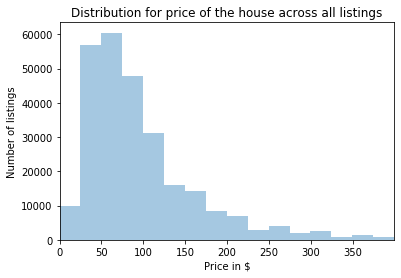

In [377]:
# Finding distribution for prices
sns.distplot(df.price,bins=800,kde= False)
plt.xlim(0,400)
plt.xticks(np.arange(0,400,50))
plt.xlabel('Price in $')
plt.ylabel('Number of listings')
plt.title('Distribution for price of the house across all listings')
plt.show()

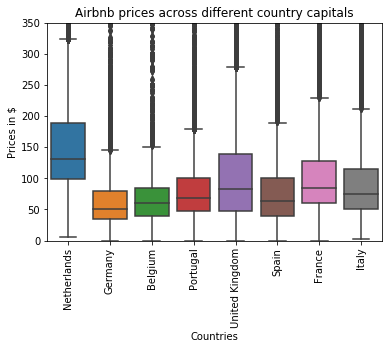

In [447]:
# Finding distribution for prices across different categories
sns.boxplot(x=df.country, y=df.price,)
plt.ylim(0,350)
plt.xlabel('Countries')
plt.ylabel('Prices in $')
plt.title('Airbnb prices across different country capitals')
plt.xticks(rotation=90)
plt.show()

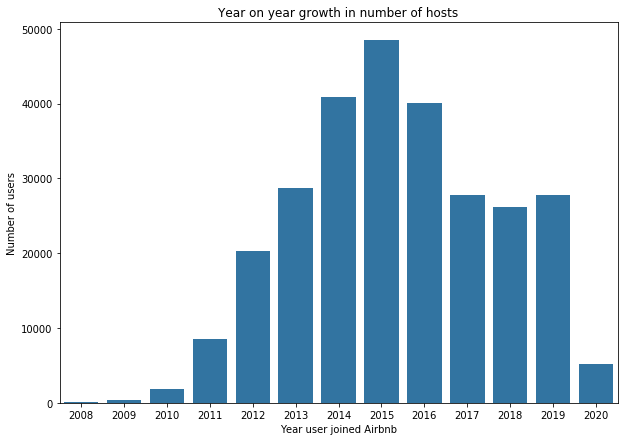

In [437]:
# userbase growth year on year
plt.figure(figsize=(10,7))
host_since_series= df.groupby(by=['year']).count()['id'].head(13)
sns.barplot(x=host_since_series.index, y= host_since_series, color= 'tab:blue')
plt.xlabel('Year user joined Airbnb')
plt.ylabel('Number of users')
plt.title('Year on year growth in number of hosts')
plt.show()

In [443]:
df.country.unique()

array(['Netherlands', 'Germany', 'Belgium', 'Portugal', 'United Kingdom',
       'Spain', 'France', 'Italy'], dtype=object)

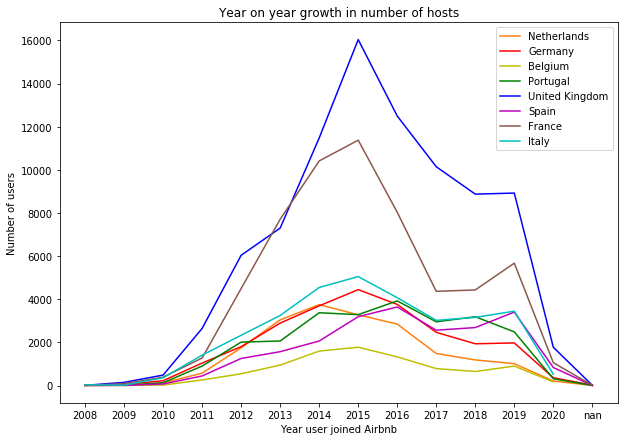

In [446]:
# userbase growth year on year
plt.figure(figsize=(10,7))
color_list= ['tab:orange','r','y','g','b','m','tab:brown','c' ]

for color,country in enumerate(df.country.unique()):
    
    host_since_series= df[df['country']==country].groupby(by=['year']).count()['id']
    
    sns.lineplot(x=host_since_series.index, y= host_since_series, color=color_list[color], label= country )
    
plt.xlabel('Year user joined Airbnb')
plt.ylabel('Number of users')
plt.title('Year on year growth in number of hosts')
plt.legend()
plt.show()

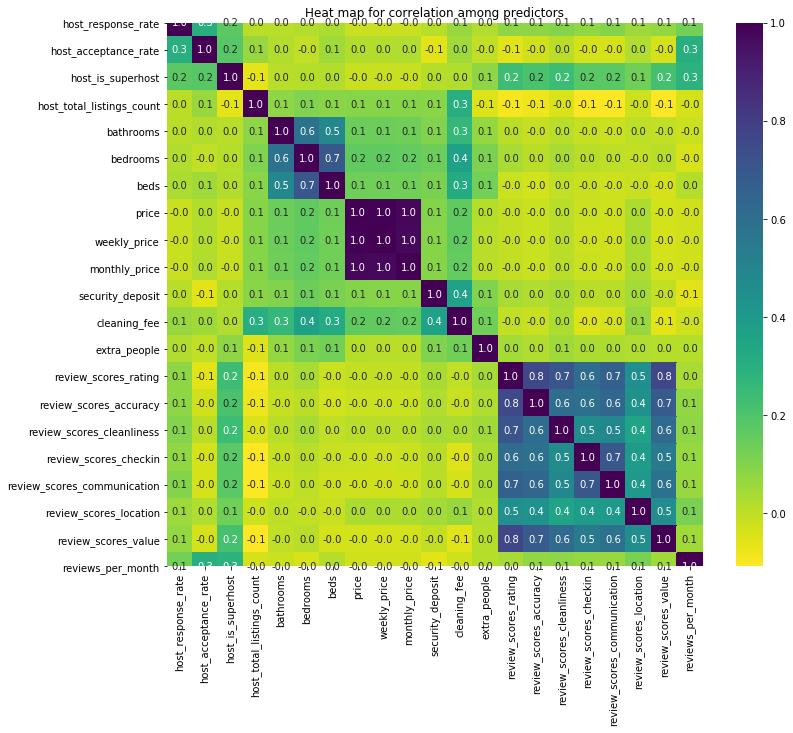

In [465]:
# Making a heatmap between correlations
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include= ['int', 'float']).corr(), annot= True, cmap='viridis_r',fmt= '.1f' )
plt.title('Heat map for correlation among predictors')
plt.show()

The heatmap shows that there is a strong correlation among rating columns, but that is understandable as people generally rate higher values for all the rating parameters. There is also a strong correlation between number of beds, bedrooms and bathrooms.

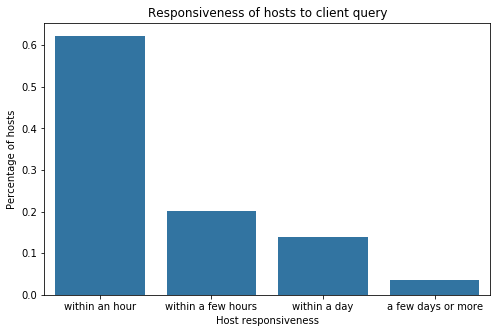

In [490]:
# Responsiveness of the host
plt.figure(figsize=(8,5))
host_response_series= df.host_response_time.value_counts()/ df.host_response_time.value_counts().sum()
sns.barplot(x=host_response_series.index, y=host_response_series, color= 'tab:blue' )
plt.xlabel('Host responsiveness')
plt.ylabel('Percentage of hosts')
plt.title('Responsiveness of hosts to client query')
plt.show()

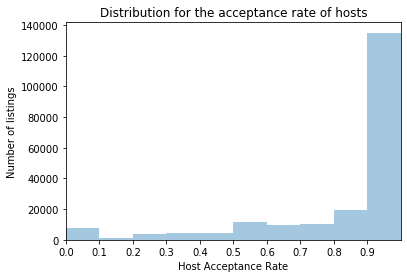

In [496]:
# Host aceptance rate
sns.distplot(df.host_acceptance_rate, bins=10, kde= False)
plt.xlim(0,1)
plt.xticks(np.arange(0,1,0.1))
plt.xlabel('Host Acceptance Rate')
plt.ylabel('Number of listings')
plt.title('Distribution for the acceptance rate of hosts')
plt.show()

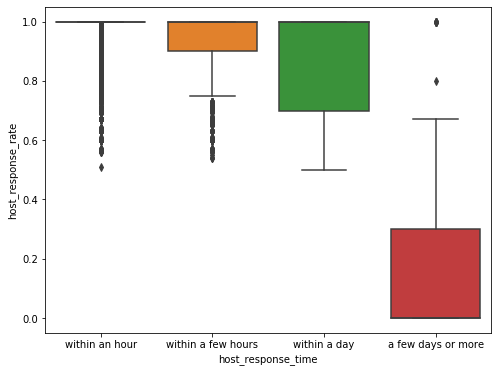

In [498]:
# Relationship between acceptance rate and responsiveness
plt.figure(figsize=(8,6))
sns.boxplot(x=df.host_response_time,y = df.host_response_rate )
plt.show()

This shows that the acceptance rate of hosts is inversely proportional to their responsiveness. More responsive hosts have better acceptance rates.

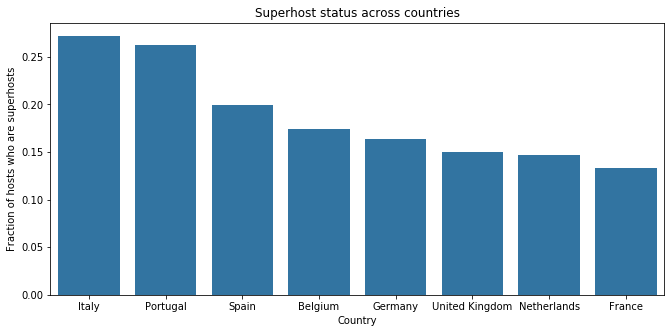

In [524]:
# Finding superhosts across countries

temp_series= df.groupby(by=[ 'country']).mean()['host_is_superhost'].sort_values(ascending= False)

plt.figure(figsize=(11,5))
sns.barplot(temp_series.index,temp_series, color= 'tab:blue')
plt.xlabel('Country')
plt.ylabel('Fraction of hosts who are superhosts')
plt.title('Superhost status across countries')
plt.show()

In [594]:
# Function to compare percents of certain column for all countries
def country_fraction(column):
    """Function to compare percents of certain column for all countries
    Input: categorical column of interest in the dataframe"""
    
    df1= df.groupby(by=[column, 'country']).count()['id'].reset_index()
    
    df2= df1.reset_index().groupby(by='country').sum().reset_index()     # total rows in each country        
    
    df12= pd.merge(df1,df2,how='outer',on=['country'] )
    df12['fraction']= df12['id_x']/ df12['id_y']  # finding fraction of the values for that country for that column
    
    return df12


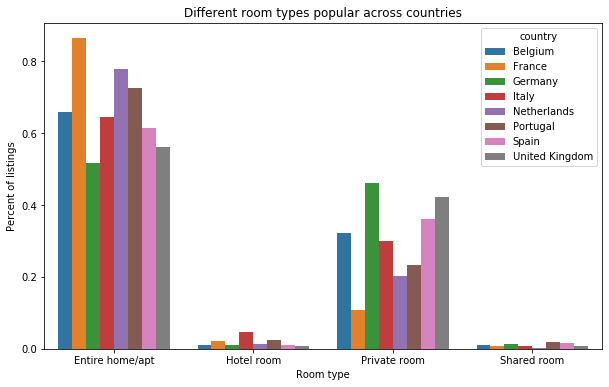

In [595]:
# Finding which room_types are most popular across countries
roomt_type_df= country_fraction('room_type')
plt.figure(figsize=(10,6))

sns.barplot(x=roomt_type_df.room_type, y=roomt_type_df.fraction, hue= roomt_type_df.country)
plt.xlabel('Room type')
plt.ylabel('Percent of listings')
plt.title('Different room types popular across countries')
plt.show()

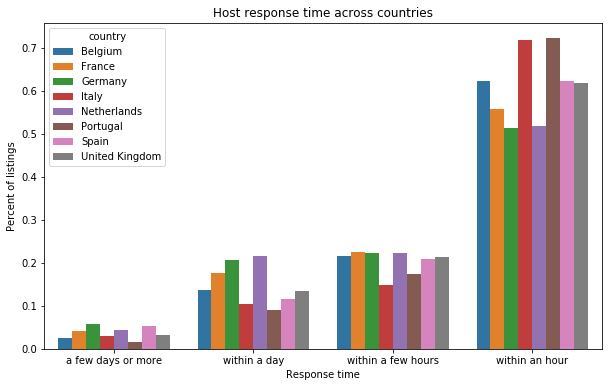

In [608]:
# Finding which countries host are most resposive
host_response_time_df = country_fraction('host_response_time')
plt.figure(figsize=(10,6))

sns.barplot(x=host_response_time_df.host_response_time,y=host_response_time_df.fraction,hue= host_response_time_df.country)
plt.xlabel('Response time')
plt.ylabel('Percent of listings')
plt.title('Host response time across countries')
plt.show()

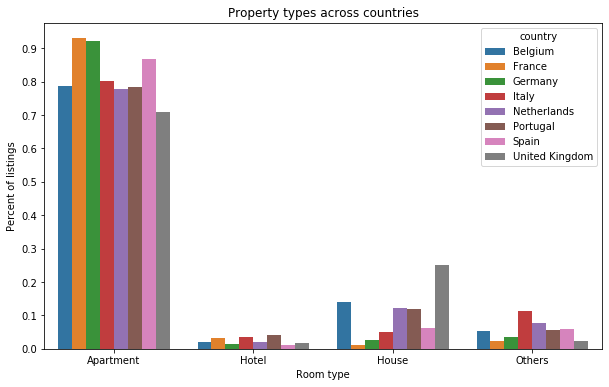

In [610]:
# Exploring different property types acorss different countries
property_category_df = country_fraction('property_category')
plt.figure(figsize=(10,6))

sns.barplot(x=property_category_df.property_category,y=property_category_df.fraction,hue= property_category_df.country)
plt.yticks(np.arange(0,1,0.1))
plt.xlabel('Room type')
plt.ylabel('Percent of listings')
plt.title('Property types across countries')
plt.show()